In [1]:
!pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

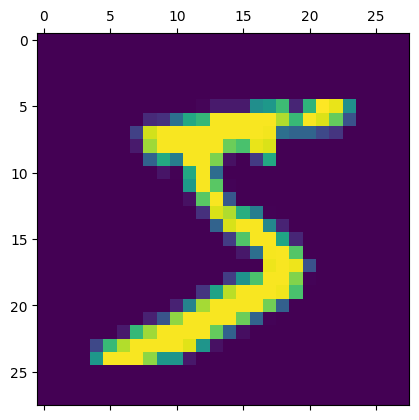

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.4509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9853 - loss: 0.0495


In [13]:
model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.1000


[0.08340443670749664, 0.9753999710083008]

In [23]:
from tensorflow.keras.models import load_model
model = load_model("./saved_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
model.export("./saved_model_tf")

Saved artifact at './saved_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137632230858016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137632230728000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137632230854848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137632837743216: TensorSpec(shape=(), dtype=tf.resource, name=None)


###**1. POST TRAINING QUANTIZATION**

In [28]:
convertor = tf.lite.TFLiteConverter.from_saved_model("./saved_model_tf")
tflite_model = convertor.convert()

In [29]:
len(tflite_model)

319948

In [30]:
convertor = tf.lite.TFLiteConverter.from_saved_model("./saved_model_tf")
convertor.optimizations = [tf.lite.Optimize.DEFAULT]
quant_model = convertor.convert()

In [31]:
len(quant_model)

86008

In [32]:
with open("tflite_model.tflite","wb") as f:
  f.write(tflite_model)

with open("quant_model.tflite","wb") as f:
  f.write(quant_model)